In [1]:
import nltk
from nltk.corpus import stopwords
import io
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer, word_tokenize
from math import log, ceil
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import io 
import re
from collections import defaultdict
from fa2 import ForceAtlas2
import numpy as np
from scipy import stats
import unicodedata
from nltk.stem.porter import *
from nltk.draw.dispersion import dispersion_plot

In [2]:
#open a text file of all the books in the book series
raw = io.open('../books/HP_all.txt', "r", encoding="utf-8").read()
#Extract any additional information on the books from the beginning and end of the file.
#books = raw[944:6317630]

In [3]:
#Isolate each book individually, from the first chapter to the last fullstop.
book1 = raw[944:441162]
book2 = raw[442547:936710]
book3 = raw[938248:1567329]
book4 = raw[1569412:2678784]
book5 = raw[2680953:4180604]
book6 = raw[4182370:5170313]
book7 = raw[5173433:6317630]

In [4]:
#Collect all the books into an arrey to more simply navigate and extract information.
book = []
book.append(book1)
book.append(book2)
book.append(book3)
book.append(book4)
book.append(book5)
book.append(book6)
book.append(book7)
print(len(book))

7


In [5]:
#Create a list of lists with the individual chapters, split at the unique word CHAPTERS.
chp = []
for bok in book:
    chp.append(bok.split("CHAPTER")[1:])
print(len(chp))

7


In [6]:
#Might not be used
def contractions(text):
    text.replace('don\'t', 'do not')
    text.replace()

In [7]:
#the stopwords for later use  in the wordcloud
stop_words = set(stopwords.words('english'))
#including "said" as it is appeard repeatedly on th wordclouds.
stop_words.add(u'said')
#print(stop_words)
#print(type(stopwords.words('english')))

In [8]:
#Function to extract only the dialog from a text, while also making sure to accound for utf-8
def dialog(book):
    book = book.encode("utf-8")
    book = book.replace('\xe2\x80\x99','\'')
    book = book.replace('\xe2\x80\x94','-')
    book = book.replace('\xe2\x80\x98','\'')
    book = book.replace("\n\n\xe2\x80\x9c", ' ')
    dialogen = re.findall(r'\“([\s\S]*?)\”', book)
    return dialogen

In [9]:
#Cleanign text, with respect to utf-8
def tolist(book):
    book = book.encode("utf-8")
    book = book.replace('\xe2\x80\x99','\'')
    book = book.replace('\xe2\x80\x94','-')
    book = book.replace('\xe2\x80\x98','\'')
    book = book.replace("\n\n\xe2\x80\x9c", ' ')
    book = book.replace("\u2019","\'")
    book = book.replace('\n',' ')
    out = book
    return out

In [10]:
#Extracting the average happyness index to be used for sentiment analysis
from collections import defaultdict
ds = pd.read_csv('../Data_Set_S1.txt', skiprows=3, sep=" ", delimiter="\t")
ds.word[ds.word == 'after'].index[0]

avg_word_happiness = defaultdict(float)
for index, data in ds.iterrows():
    word =  data["word"]
    score = data["happiness_average"]
    avg_word_happiness[word] = score

In [11]:
#function to calculate sentiment on a list of tokens
def sentiment(toke):
    tokens = [x.lower() for x in toke]
    unique_tokens = list(set(tokens))
    sum = 0
    remove = 0
    for token in unique_tokens:
        if avg_word_happiness.has_key(token):
            h = avg_word_happiness[token]
            f = tokens.count(token)
            sum += (h*f)
        else:
            remove += tokens.count(token)
    if (len(tokens)-remove) == 0:
        sent = 0
    else:
        sent= sum/(len(tokens)-remove)
    return sent

In [12]:
#creating a list of lists of the the dialogs on each book.
dilog = []
for bok in book:
    dilog.append(dialog(bok))
print(len(dilog))

7


In [13]:
#tokenizes an list input
def tokenize_list(text):
    tokenizer = RegexpTokenizer(r'\w+')
    dialog = []
    for i in range(len(text)):
        line = tokenizer.tokenize(text[i])
        dialog.append(line)
    return dialog

#tokenizes a string input
def tokenize_str(text):
    tokenizer = RegexpTokenizer(r'\w+')
    line = tokenizer.tokenize(text)
    return line

In [14]:
#function to evaluate the sentiment analysis of the dialog
def sentiment_dilog(dialog):
    g = tokenize_list(dialog)
    sent = []
    for i in range(len(g)):
        sen = sentiment(g[i])
        sent.append(sen)
    return sent

In [15]:
#Find the sentimen for each of the books based on dialog. i belive this is the most efficient as dialog better reflects
#a mood than the desciptive parts of a book.
sendilog = []
for boook in dilog:
    sendilog.append(sentiment_dilog(boook))
for senti in sendilog:
    print(np.mean(senti))

5.308377204471506
5.295769655712531
5.286883953145128
5.267052585703176
5.272197023995928
5.2909159492604605
5.20978714308175


In [16]:
dilog[0]

['Little tyke,',
 "Don't be sorry, my dear sir, for nothing could upset me today! Rejoice, for You-Know-Who has gone at last! Even Muggles like yourself should be celebrating, this happy, happy day!",
 "Won't!",
 'Most mysterious. And now, over to Jim McGuffin with the weather. Going to be any more showers of owls tonight, Jim?',
 "I don't know about that, but it's not only the owls that have been acting oddly today. Viewers as far apart as Kent, Yorkshire, and Dundee have been phoning in to tell me that instead of the rain I promised yesterday, they've had a downpour of shooting stars! Perhaps people have been celebrating Bonfire Night early - it's not until next week, folks! But I can promise a wet night tonight.",
 "Er - Petunia, dear - you haven't heard from your sister lately, have you?",
 'Why?',
 'Owls . . . shooting stars . . . and there were a lot of funny-looking people in town today . . .',
 'Potter.',
 "Their son - he'd be about Dudley's age now, wouldn't he?",
 'Yes, I qui

In [17]:
#Sentimant analysis of each book
senbook = []
for each in book:
    senbook.append(sentiment(tokenize_str(each)))
    print(sentiment(tokenize_str(each)))

5.33385911817
5.32007207254
5.31981087567
5.33023696409
5.32624551042
5.3280163771
5.29587962731


In [18]:
#function to extract stopwords from a string
def stopwords(book):
    unique = set(book)
    bo = book
    for word in unique:
        if word in stop_words:
            bo.remove(word)
    return bo

In [19]:
#remove stopwwords and tokenize the books
nostop = []
for each in book:
    nostop.append(stopwords(tokenize_str(each)))

In [20]:
#function to calculate the TF-IDF, tanken from prior assignment in the course
def TF_IDF(documents):
    result = []
    cross_document_freq = defaultdict(int)
    #count in how many documents the token occurs
    for document in documents:
        for token in set(document):
            cross_document_freq[token] += 1 
    
    for document in documents:
        TF = FreqDist(document)
        # calculate the TF/IDF for each token
        TF_IDF = defaultdict(float) 
        for token in TF.keys():
            TF_IDF[token] = TF[token] * log(len(documents)/cross_document_freq[token])
            
        result.append(sorted(TF_IDF.iteritems(), key=lambda (k,v): (v,k), reverse=True))
    return result

In [21]:
#For the world could illustration, taken form earlier exercise in the course
def generate_cloud_string(freq_list):
    result = ""
    for token, frequency in freq_list:
        result += (token + " ") * int(ceil(frequency))
    return result   

In [22]:
#Function to display the wordcloud, taken from earlier assignment in the course.
def display_cloud(string, background="black",title ="",mask=None, collocations=False, stop_words={} ):
    cloud = WordCloud(
        background_color=background,
        width=1800,
        height=1400,
        mask = mask,
        stopwords=stop_words,
        collocations=collocations
    ).generate(string)
    plt.figure(figsize=(20,20))
    plt.imshow(cloud)
    plt.axis('off')
    #plt.savefig("./" + title.replace(" ", "") + ".png", dpi=300)
    plt.title(title)
    plt.show()

In [23]:
WC = TF_IDF([nostop[0],nostop[1],nostop[2],nostop[3],nostop[4],nostop[5],nostop[6]])

In [24]:
CL = []
for i in WC:
    CL.append(generate_cloud_string(i))

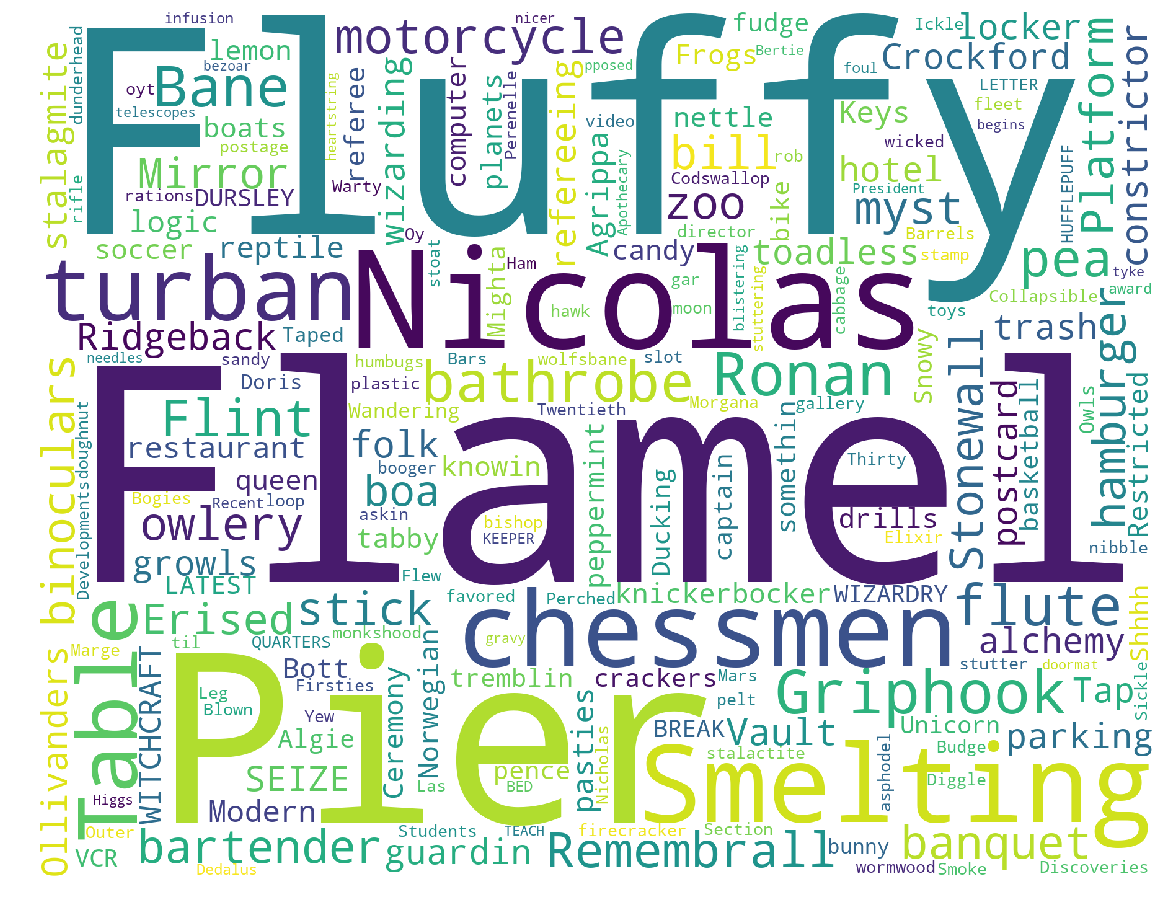

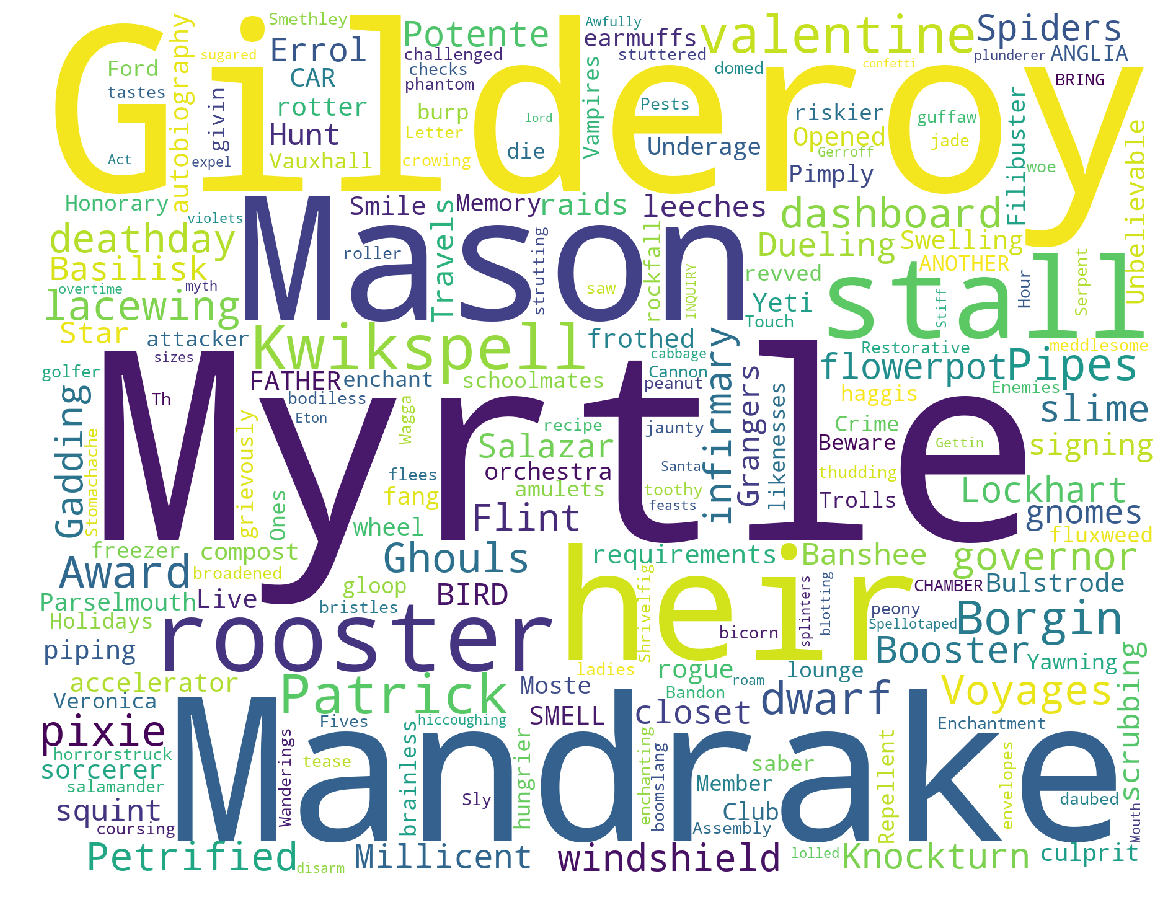

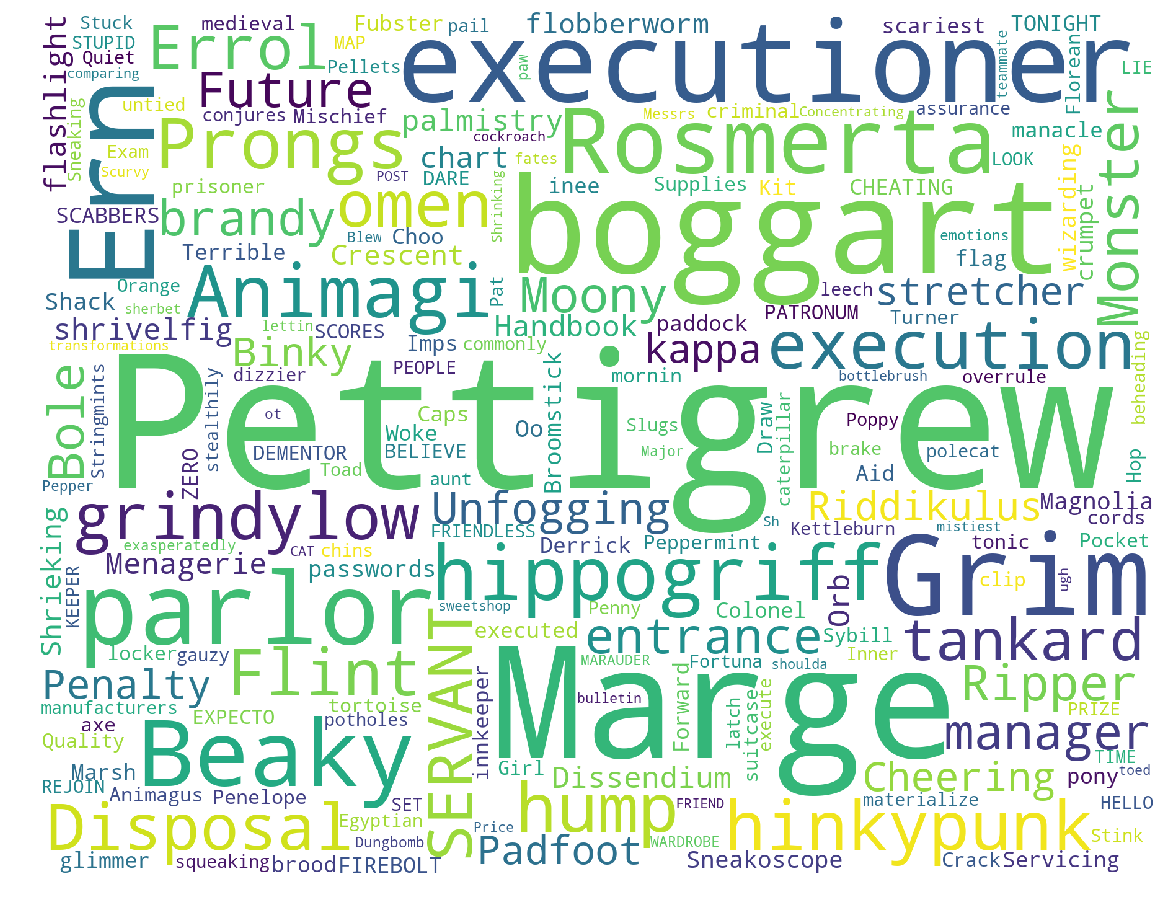

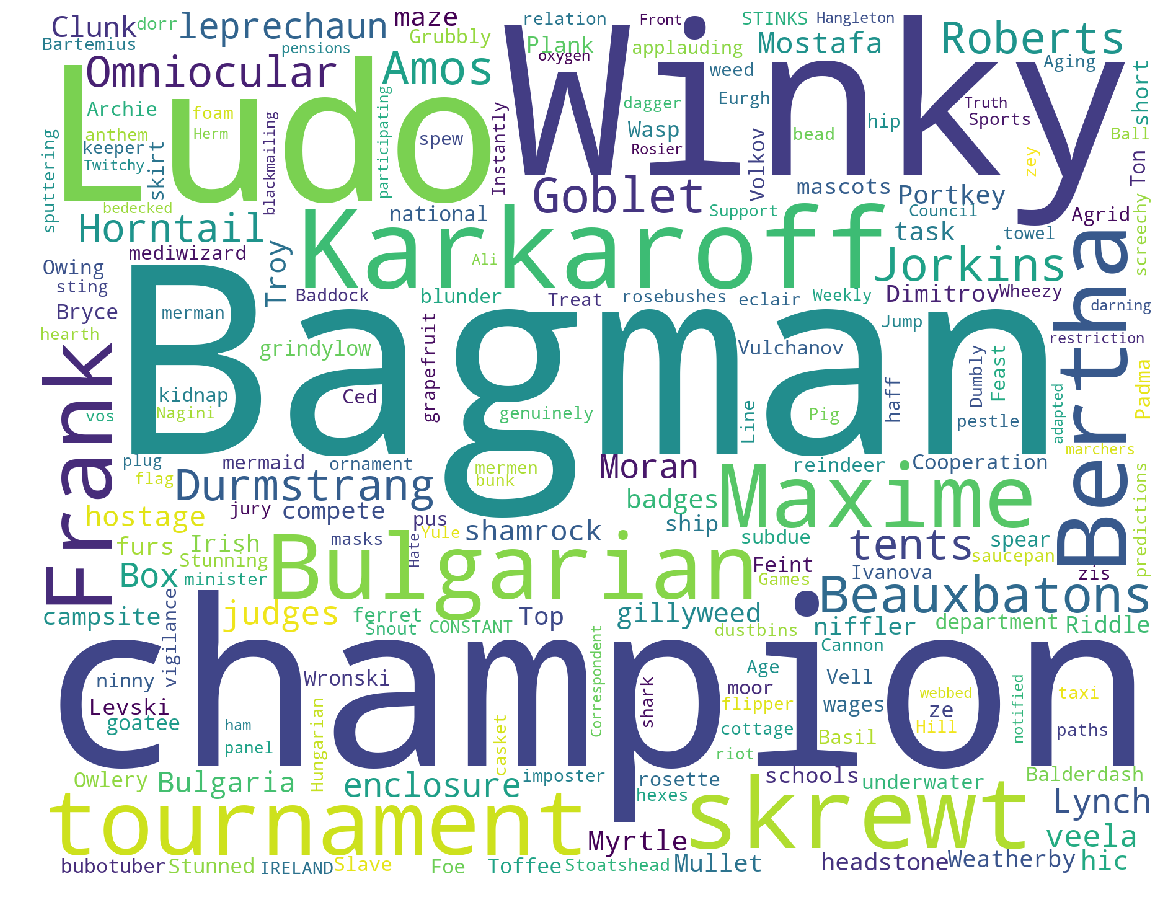

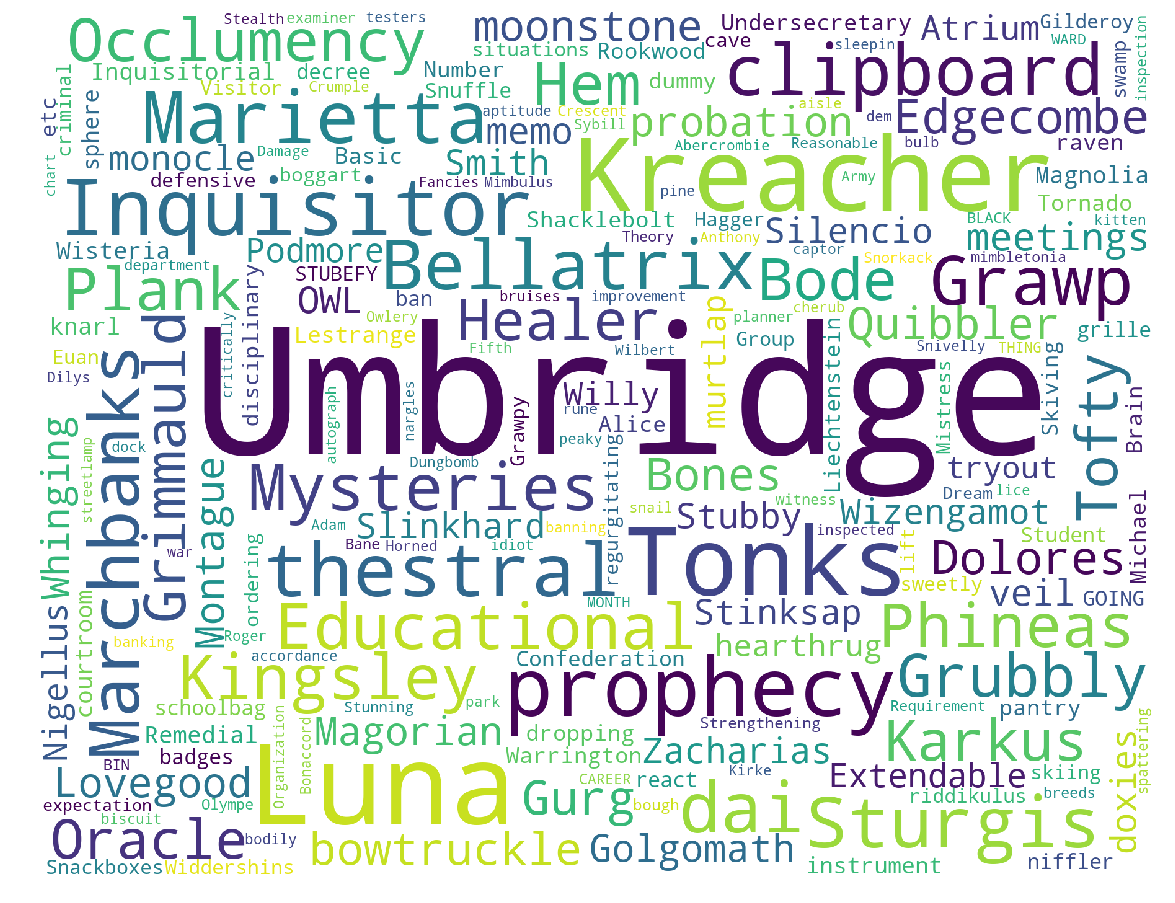

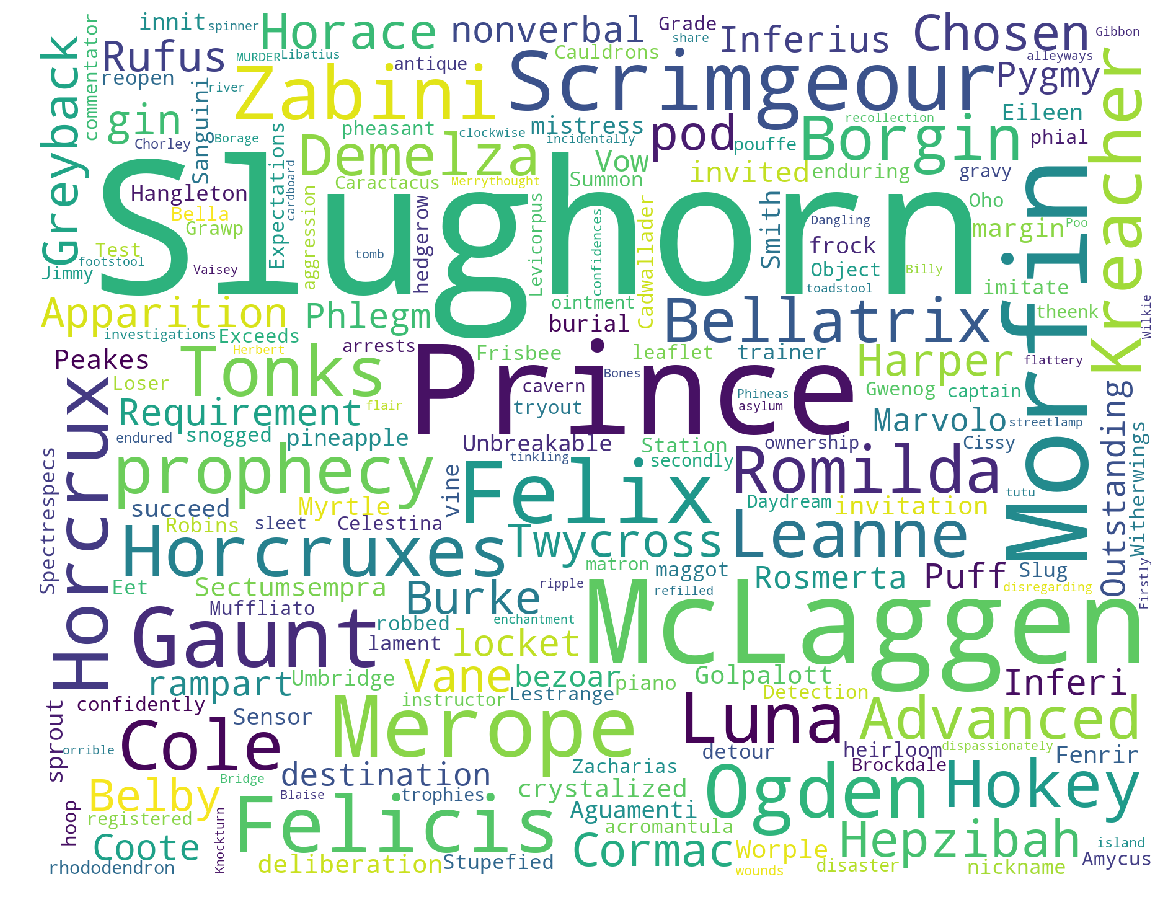

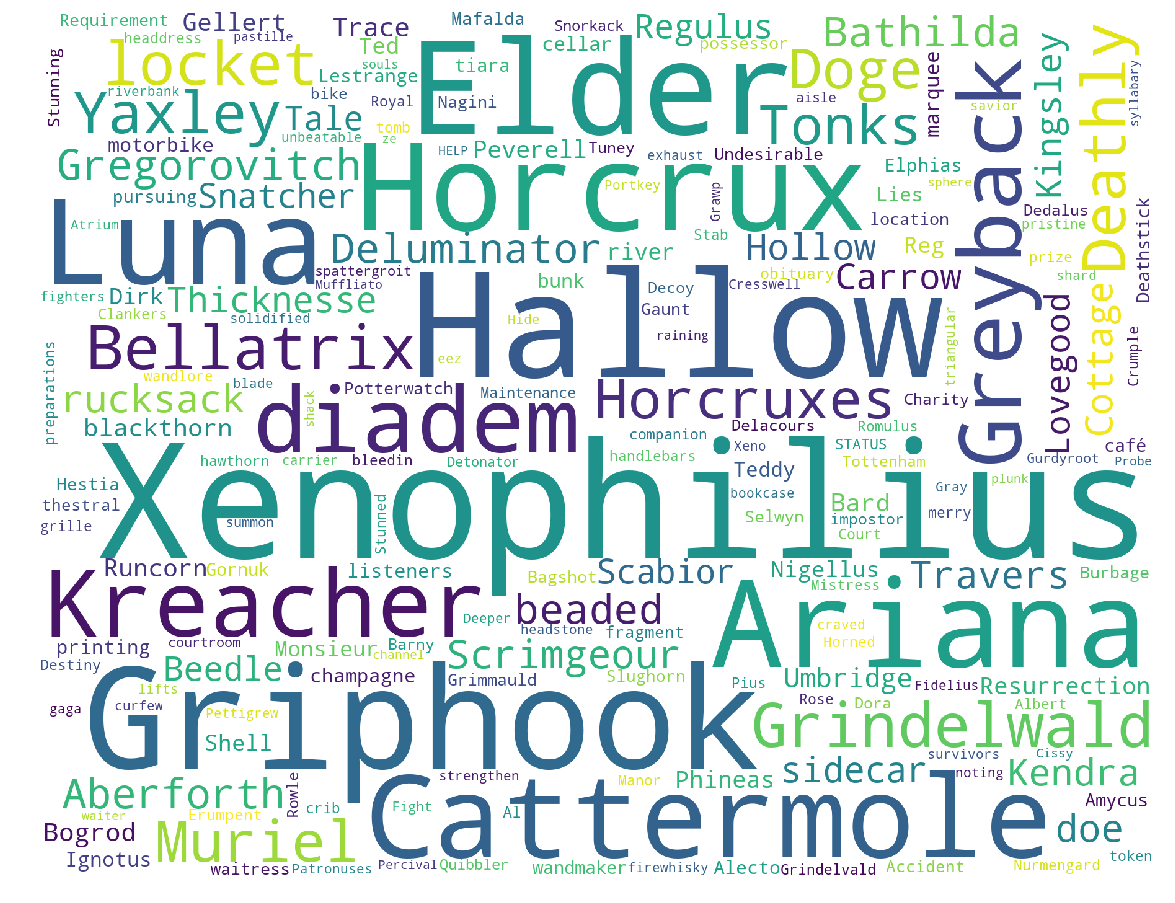

In [25]:
white = "#ffffff"
for j in CL:
    display_cloud(j, white, stop_words=stop_words)

In [26]:
#sentiment for dialog in the chapters chapters
def sentchap(chpX):
    senchp = []
    for chap in chpX:
        senchp.append(sentiment_dilog(dialog(chap)))
    return senchp

In [27]:
def remove_values_from_list(the_list, val):
    while val in the_list:
        the_list.remove(val)

In [28]:
def avesentchp(senchpX):
    senchp = []
    for i in senchpX:
        remove_values_from_list(i,0)
        senchp.append(np.mean(i))
    return senchp

In [29]:
avesent = []
for books in chp:
    avesent.append(avesentchp(sentchap(books)))

C:\Users\Vello\Anaconda2\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Vello\Anaconda2\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [30]:
#sentiment of chapters
chapsent = []
for chap in chp:
    sentimen = []
    for each in chap:
        sentimen.append(sentiment(each))
    chapsent.append(sentimen)

In [31]:
text = nltk.Text(book[0]+book[1]+book[2]+book[3]+book[4]+book[5]+book[6])

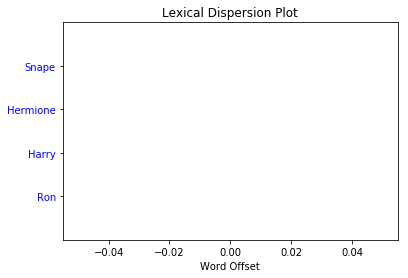

In [32]:
text.dispersion_plot(["Snape", "Hermione", "Harry", "Ron"])

In [33]:
from nltk.util import bigrams

In [34]:
def generate_collocations(tokens):
    '''
    Given list of tokens, return collocations.
    '''
    ignored_words = nltk.corpus.stopwords.words('english')
    bigram_measures = nltk.collocations.BigramAssocMeasures()

    # Best results with window_size, freq_filter of: (2,1) (2,2) (5,1)
    finder = nltk.collocations.BigramCollocationFinder.from_words(tokens, window_size = 2)
    finder.apply_word_filter(lambda w: len(w) < 3 or w.lower() in ignored_words)
    finder.apply_freq_filter(1)

    colls = finder.nbest(bigram_measures.likelihood_ratio, 100)

    return colls 

In [35]:
books = tokenize_list(book)
books[6]

[u'CHAPTER',
 u'ONE',
 u'THE',
 u'DARK',
 u'LORD',
 u'ASCENDING',
 u'The',
 u'two',
 u'men',
 u'appeared',
 u'out',
 u'of',
 u'nowhere',
 u'a',
 u'few',
 u'yards',
 u'apart',
 u'in',
 u'the',
 u'narrow',
 u'moonlit',
 u'lane',
 u'For',
 u'a',
 u'second',
 u'they',
 u'stood',
 u'quite',
 u'still',
 u'wands',
 u'directed',
 u'at',
 u'each',
 u'other',
 u's',
 u'chests',
 u'then',
 u'recognizing',
 u'each',
 u'other',
 u'they',
 u'stowed',
 u'their',
 u'wands',
 u'beneath',
 u'their',
 u'cloaks',
 u'and',
 u'started',
 u'walking',
 u'briskly',
 u'in',
 u'the',
 u'same',
 u'direction',
 u'News',
 u'asked',
 u'the',
 u'taller',
 u'of',
 u'the',
 u'two',
 u'The',
 u'best',
 u'replied',
 u'Severus',
 u'Snape',
 u'The',
 u'lane',
 u'was',
 u'bordered',
 u'on',
 u'the',
 u'left',
 u'by',
 u'wild',
 u'low',
 u'growing',
 u'brambles',
 u'on',
 u'the',
 u'right',
 u'by',
 u'a',
 u'high',
 u'neatly',
 u'manicured',
 u'hedge',
 u'The',
 u'men',
 u's',
 u'long',
 u'cloaks',
 u'flapped',
 u'around',
 

In [36]:
generate_collocations(books[0])

[(u'Uncle', u'Vernon'),
 (u'Professor', u'McGonagall'),
 (u'Aunt', u'Petunia'),
 (u'said', u'Ron'),
 (u'said', u'Hagrid'),
 (u'said', u'Harry'),
 (u'Privet', u'Drive'),
 (u'common', u'room'),
 (u'Nimbus', u'Two'),
 (u'Great', u'Hall'),
 (u'Two', u'Thousand'),
 (u'Mrs', u'Dursley'),
 (u'Madam', u'Pomfrey'),
 (u'Invisibility', u'Cloak'),
 (u'Mrs', u'Norris'),
 (u'Leaky', u'Cauldron'),
 (u'Madam', u'Hooch'),
 (u'Nicolas', u'Flamel'),
 (u'first', u'years'),
 (u'Hermione', u'Granger'),
 (u'said', u'Hermione'),
 (u'Professor', u'Flitwick'),
 (u'third', u'floor'),
 (u'Fat', u'Lady'),
 (u'Professor', u'Dumbledore'),
 (u'Diagon', u'Alley'),
 (u'Lee', u'Jordan'),
 (u'Professor', u'Quirrell'),
 (u'Smelting', u'stick'),
 (u'Dark', u'Arts'),
 (u'House', u'Cup'),
 (u'looked', u'like'),
 (u'Flavor', u'Beans'),
 (u'could', u'see'),
 (u'Mrs', u'Figg'),
 (u'fifty', u'points'),
 (u'entrance', u'hall'),
 (u'Bloody', u'Baron'),
 (u'High', u'Table'),
 (u'Harry', u'Potter'),
 (u'Chocolate', u'Frogs'),
 (u'Dr